# Graph

* 정의: Graph $G=(V,E)$, $V=\{v_1, v_2, ..., v_n\}$ and $E=\{(v_i,v_j)\}$ ($|E| \leq \frac{1}{2}|V|(|V|-1)$)
* 선형자료구조 혹은 트리로 표현하기 힘들면 사용하기에 용이
* 용어:
 * adjacency: e.g., $v_1 \rightarrow v_2$ 이면, $v_2$ 는 $v_1$ 의 adjacency. But, $v_1$ 은 $v_2$ 의 adjacency는 아님.
 * complete graph: 모든 vertex 가 adjacent
 * cycle graph:
 * DAG (Directed Acyclic Graph): cycle이 없는 directed grpah

## 1) 기본구조

### 1-1) 간단한 구현: Directed/Undirected

In [44]:
class GraphList:
    def __init__(self, n_vertices=0):
        self.n_vertices = n_vertices
        self.graph = {v:[] for v in range(n_vertices)}
    
    def add_vertex(self, v):
        self.graph[v] = []
      
    def print_graph(self):
        print("Print Graph")
        for v, adj_list  in self.graph.items():
            print("Adjacency list of veretx {}".format(v), end="")
            for adj in adj_list:
                print(" -> {}".format(adj), end="")
            print("")
            
class DirectedGraphList(GraphList):
    def __init__(self, n_vertices):
        super().__init__(n_vertices)
        
    def add_edge(self, src, dest):
        if src not in self.graph.keys():
            self.add_vertex(src)
        self.graph[src].append(dest)
        
class UndirectedGraphList(GraphList):
    def __init__(self, n_vertices):
        super().__init__(n_vertices)
        
    def add_edge(self, src, dest):
        for v in [src, dest]:
            if (v not in self.graph.keys()):
                self.add_vertex(v)
                self.n_vertices += 1
        self.graph[src].append(dest)
        self.graph[dest].append(src)

### 1-2) Linked list 이용한 구현: Directed/Undirected 

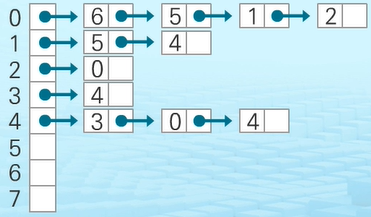
Reference: https://www.geeksforgeeks.org/graph-and-its-representations/

In [ ]:
class Node:
    def __init__(self, x, weight=0):
        self.vertex = x
        self.weight = w
        self.next = None
        
class GraphLinkedList:
    def __init__(self, n_vertices=0):
        self.n_vertices = n_vertices
        self.graph = [None] * self.n_vertices

    def print_graph(self):
        print("Print the graph")
        for i in range(self.n_vertices):
            print("Adjacency list of vertex {}".format(i), end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print("")  
            
class DirectedGraphLinkedList(GraphLinkedList):
    def __init__(self, n_vertices):
        super().__init__(n_vertices)
        
    def add_edge(self, src, dest):
        node = Node(dest)
        node.next = self.graph[src]
        self.graph[src] = node
        
class UndirectedGraphLinkedList(GraphLinkedList):
    def __init__(self, n_vertices):
        super().__init__(n_vertices)
        
    def add_edge(self, src, dest):
        node = Node(dest)
        node.next = self.graph[src]
        self.graph[src] = node
        
        node = Node(src)
        node.next = self.graph[dest]
        self.graph[dest] = node

In [48]:
# Directed Graph: 위 그림에 대한 예제
DG_linkedlist = DirectedGraphLinkedList(7)

DG_linkedlist.add_edge(0, 2)
DG_linkedlist.add_edge(0, 1)
DG_linkedlist.add_edge(0, 5)
DG_linkedlist.add_edge(0, 6)
DG_linkedlist.add_edge(1, 4)
DG_linkedlist.add_edge(1, 5)
DG_linkedlist.add_edge(2, 0)
DG_linkedlist.add_edge(3, 4)
DG_linkedlist.add_edge(4, 4)
DG_linkedlist.add_edge(4, 0)
DG_linkedlist.add_edge(4, 3)

DG_linkedlist.print_graph()

# Undirected Graph
UDG_linkedlist = UndirectedGraphLinkedList(7)

UDG_linkedlist.add_edge(0, 2)

UDG_linkedlist.print_graph()

### 1-3) Adjacent matrix 를 이용한 구현

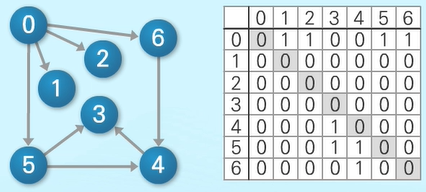

In [53]:
class GraphMartix:
    def __init__(self, n_vertices):
        self.n_vertices = n_vertices
        self.graph = [[0]*n_vertices for _ in range(n_vertices)]
        
    def add_vertex(v):
        self.n_vertices += 1
        for v_adj in self.graph:
            v_adj.append(0)
        self.graph.append([0]*self.n_vertices)
        
    def add_edge(self, src, dest, weight=1):
        for v in [src, dest]:
            if (v not in range(self.n_vertices)):
                self.add_vertex(v) 
        self.graph[src][dest] = weight
        
    def print_graph(self):
        for src in range(self.n_vertices):
            print("Adjacency list of veretx {}:".format(src), end="")
            for dest in range(self.n_vertices):
                if self.graph[src][dest] != 0:
                    print(" {} ({})".format(dest, self.graph[src][dest]))

## 2) Graph search 

### 2-1) DFS 개념

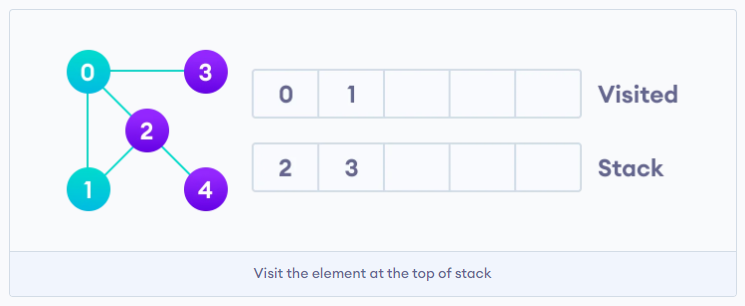

DFS: 0 - 1 - 2 - 4 - 3

* 1) using resursive call
* 2) using stack

### 2-2) DFS 구현: recursion

In [32]:
def _DFS_recursion(self, v, visited):
    visited.add(v)
    print("Visit: ", v)
    for adj_v in self.graph[v]:
        if (adj_v not in visited):
            self._DFS_recursion(adj_v, visited)

def DFS_recursion(self, start):
    print("DFS by recursion. Start from the vertext,", start)
    visited = set()
    self._DFS_recursion(start, visited)
        
UndirectedGraphList.DFS_recursion = DFS_recursion
UndirectedGraphList._DFS_recursion = _DFS_recursion


# 그래프 선언
g = UndirectedGraphList(5)

g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(2,4)
g.print_graph()

# DFS by recursion
g.DFS_recursion(0)

Print Graph
Adjacency list of veretx 0 -> 1 -> 2 -> 3
Adjacency list of veretx 1 -> 0 -> 2
Adjacency list of veretx 2 -> 0 -> 1 -> 4
Adjacency list of veretx 3 -> 0
Adjacency list of veretx 4 -> 2
DFS by recursion. Start from the vertext, 0
Visit:  0
Visit:  1
Visit:  2
Visit:  4
Visit:  3


### 2-3) DFS: stack

In [49]:
def DFS_stack(self, start):
    visited = []
    stack = [start]

    while (len(stack) > 0):
        v = stack.pop()
        print("Visit:", v)
        print(stack)
        if v not in visited:
            visited.append(v)
            stack += (set(reversed(self.graph[v])) - set(visited))
        
UndirectedGraphList.DFS_stack = DFS_stack

# 그래프 선언
g = UndirectedGraphList(5)

g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(2,4)
g.print_graph()

# DFS by recursion
g.DFS_stack(0)

Print Graph
Adjacency list of veretx 0 -> 1 -> 2 -> 3
Adjacency list of veretx 1 -> 0 -> 2
Adjacency list of veretx 2 -> 0 -> 1 -> 4
Adjacency list of veretx 3 -> 0
Adjacency list of veretx 4 -> 2
Visit: 0
[]
Visit: 3
[1, 2]
Visit: 2
[1]
Visit: 4
[1, 1]
Visit: 1
[1]
Visit: 1
[]


In [50]:
l = [2,1]
set(l)

{1, 2}

### 2-2) BFS

* 1) using resursive call
* 2) using stack

In [61]:
from collections import defaultdict
x = defaultdict(list)
x[0]=2,3
x

defaultdict(list, {0: (2, 3)})

## 3) Disjoint set 

### 3-1) MakeSet

### 3-2) FindSet

### 3-3) Union